Error loading dataset 1. Creating synthetic data for testing.

Initial cost: 0.6931

Running gradient descent...
Iter 0 Cost 0.6930
Iter 500 Cost 0.6226
Iter 1000 Cost 0.5666
Iter 1500 Cost 0.5215
Iter 2000 Cost 0.4848
Iter 2500 Cost 0.4543
Iter 3000 Cost 0.4288
Iter 3500 Cost 0.4072
Iter 4000 Cost 0.3885
Iter 4500 Cost 0.3723
Iter 5000 Cost 0.3581
Iter 5500 Cost 0.3455
Iter 6000 Cost 0.3342
Iter 6500 Cost 0.3241
Iter 7000 Cost 0.3150
Iter 7500 Cost 0.3066
Iter 8000 Cost 0.2990
Iter 8500 Cost 0.2920
Iter 9000 Cost 0.2856
Iter 9500 Cost 0.2796

Training accuracy: 97.00%


Testing with regularization...
Error loading dataset 2. Creating synthetic non-linear data.
After feature mapping: X shape (100, 28)

Regularized cost (lambda=1.0): 0.6931

Running regularized gradient descent...
Iter 0 Cost 0.2470
Iter 500 Cost 0.2182
Iter 1000 Cost 0.1973
Iter 1500 Cost 0.1818
Iter 2000 Cost 0.1697
Iter 2500 Cost 0.1599
Iter 3000 Cost 0.1516
Iter 3500 Cost 0.1444
Iter 4000 Cost 0.1380
Iter 4500 Cost 

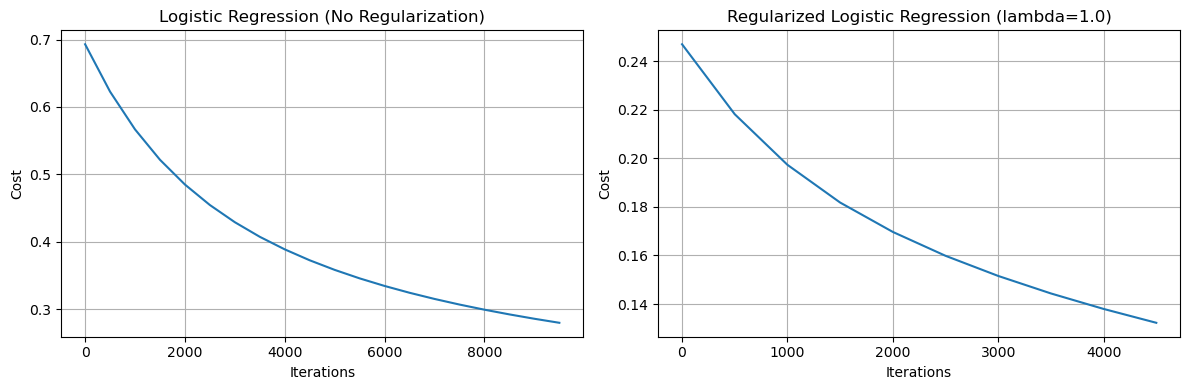


All tests completed successfully!


In [10]:
# Import necessary libraries: numpy for numerical computations, matplotlib for plotting, math for mathematical functions
import numpy as np
import matplotlib.pyplot as plt
import math

# Define the sigmoid function (logistic function) with numerical stability improvements
# The clip function prevents overflow by limiting values between -500 and 500
def sigmoid(z):
    # Clip z values to prevent overflow in exponential calculation
    z = np.clip(z, -500, 500)
    # Return sigmoid value: 1/(1 + e^-z)
    return 1 / (1 + np.exp(-z))

# Define the cost function for logistic regression (binary cross-entropy loss)
# This calculates how well the model is performing
def compute_cost(X, y, w, b, lambda_=0):
    # Get number of training examples (m)
    m = X.shape[0]
    # Small epsilon value to prevent log(0) which would be undefined
    epsilon = 1e-15
    
    # Calculate linear combination: z = X*w + b
    z = X @ w + b
    # Apply sigmoid to get probabilities
    f = sigmoid(z)
    
    # Calculate binary cross-entropy loss for each example
    # -y*log(f) - (1-y)*log(1-f)
    cost = -y * np.log(f + epsilon) - (1 - y) * np.log(1 - f + epsilon)
    # Return average cost across all examples
    return np.mean(cost)

# Define the gradient calculation function (partial derivatives of cost w.r.t parameters)
# This tells us how to update w and b to reduce cost
def compute_gradient(X, y, w, b, lambda_=0):
    # Get number of training examples
    m = X.shape[0]
    
    # Calculate linear combination and sigmoid output
    z = X @ w + b
    f = sigmoid(z)
    
    # Calculate error: difference between prediction and actual value
    error = f - y
    # Gradient for weights: (1/m) * X^T * error
    dj_dw = (1 / m) * (X.T @ error)
    # Gradient for bias: average of errors
    dj_db = np.mean(error)

    # Return both gradients
    return dj_db, dj_dw

# Define the regularized cost function (adds penalty for large weights)
# Lambda controls regularization strength - prevents overfitting
def compute_cost_reg(X, y, w, b, lambda_):
    # Calculate basic cost without regularization
    cost = compute_cost(X, y, w, b)
    # Add regularization term: (lambda/2m) * sum(w^2)
    # This penalizes large weight values
    reg = (lambda_ / (2 * len(y))) * np.sum(w ** 2)
    # Return total cost (basic + regularization)
    return cost + reg

# Define the regularized gradient function
# Adds regularization term to weight gradients
def compute_gradient_reg(X, y, w, b, lambda_):
    # Get basic gradients (without regularization)
    dj_db, dj_dw = compute_gradient(X, y, w, b)
    # Add regularization term to weight gradients: (lambda/m) * w
    dj_dw += (lambda_ / len(y)) * w
    # Return updated gradients
    return dj_db, dj_dw

# Define gradient descent optimization algorithm
# Iteratively updates parameters to minimize cost
def gradient_descent(X, y, w, b, cost_fn, grad_fn, alpha, iters, lambda_):
    # List to store cost history for plotting
    J = []
    # Main optimization loop
    for i in range(iters):
        # Calculate gradients at current parameters
        dj_db, dj_dw = grad_fn(X, y, w, b, lambda_)
        # Update weights: w = w - alpha * gradient
        w -= alpha * dj_dw
        # Update bias: b = b - alpha * gradient
        b -= alpha * dj_db

        # Every 500 iterations, record and print cost
        if i % 500 == 0:
            # Calculate current cost
            J.append(cost_fn(X, y, w, b, lambda_))
            # Print progress
            print(f"Iter {i} Cost {J[-1]:.4f}")

    # Return final parameters and cost history
    return w, b, J

# Define prediction function
# Converts probabilities to binary predictions (0 or 1)
def predict(X, w, b):
    # Calculate probabilities using learned parameters
    probs = sigmoid(X @ w + b)
    # Convert to binary predictions: 1 if probability >= 0.5, else 0
    return (probs >= 0.5).astype(int)

# Define feature mapping function for polynomial features
# Creates polynomial combinations of features for non-linear decision boundaries
def map_feature(X1, X2, degree=6):
    # Start with column of ones (bias term)
    out = np.ones((X1.shape[0], 1))
    # Create polynomial features up to specified degree
    for i in range(1, degree + 1):
        for j in range(i + 1):
            # Create term: X1^(i-j) * X2^j
            term = (X1 ** (i - j)) * (X2 ** j)
            # Add as new column to output
            out = np.hstack((out, term.reshape(-1, 1)))
    # Return feature matrix with polynomial terms
    return out

# Define data loading function
# Reads CSV file and separates features (X) and labels (y)
def load_data(file):
    # Load data from CSV file
    data = np.loadtxt(file, delimiter=',')
    # Return features (all columns except last) and labels (last column)
    return data[:, :-1], data[:, -1]

# Main execution block - runs when script is executed directly
if __name__ == "__main__":
    # Try to load first dataset (linear classification problem)
    try:
        # Load dataset 1
        X, y = load_data("data/ex2data1.txt")
        # Print dataset information
        print(f"Dataset 1 loaded: X shape {X.shape}, y shape {y.shape}")
    except:
        # If file not found, create synthetic data for testing
        print("Error loading dataset 1. Creating synthetic data for testing.")
        # Set random seed for reproducibility
        np.random.seed(42)
        # Create random features
        X = np.random.randn(100, 2)
        # Create simple linear decision boundary: X1 + X2 > 0
        y = (X[:, 0] + X[:, 1] > 0).astype(float)
    
    # Initialize parameters: weights to zeros, bias to 0
    w = np.zeros(X.shape[1])
    b = 0
    
    # Calculate and print initial cost (should be high)
    print(f"\nInitial cost: {compute_cost(X, y, w, b):.4f}")
    
    # Run gradient descent without regularization
    print("\nRunning gradient descent...")
    # Call gradient descent with: data, initial params, cost function, gradient function, learning rate, iterations, lambda=0
    w, b, J = gradient_descent(X, y, w, b, compute_cost, compute_gradient, 
                               alpha=0.001, iters=10000, lambda_=0)
    
    # Make predictions using trained model
    y_pred = predict(X, w, b)
    # Calculate accuracy: percentage of correct predictions
    accuracy = np.mean(y_pred == y) * 100
    print(f"\nTraining accuracy: {accuracy:.2f}%")
    
    # Start testing with regularization (for non-linear problems)
    print("\n\nTesting with regularization...")
    
    # Try to load second dataset (non-linear classification problem)
    try:
        # Load dataset 2
        X2, y2 = load_data("data/ex2data2.txt")
        print(f"Dataset 2 loaded: X shape {X2.shape}, y shape {y2.shape}")
    except:
        # If file not found, create synthetic non-linear data
        print("Error loading dataset 2. Creating synthetic non-linear data.")
        # Set random seed for reproducibility
        np.random.seed(42)
        # Create random features with larger spread
        X1 = np.random.randn(100) * 2
        X2 = np.random.randn(100) * 2
        # Create non-linear decision boundary: circle (X1^2 + X2^2 > 2)
        y2 = (X1**2 + X2**2 > 2).astype(float)
        # Stack features into matrix
        X2 = np.column_stack((X1, X2))
    
    # Apply polynomial feature mapping to handle non-linearity
    X2_mapped = map_feature(X2[:, 0], X2[:, 1])
    print(f"After feature mapping: X shape {X2_mapped.shape}")
    
    # Initialize parameters for regularized model
    w2 = np.zeros(X2_mapped.shape[1])
    b2 = 0
    
    # Test regularized cost calculation
    lambda_val = 1.0  # Regularization parameter
    print(f"\nRegularized cost (lambda={lambda_val}): {compute_cost_reg(X2_mapped, y2, w2, b2, lambda_val):.4f}")
    
    # Run gradient descent with regularization
    print("\nRunning regularized gradient descent...")
    w2, b2, J2 = gradient_descent(X2_mapped, y2, w2, b2, compute_cost_reg, 
                                  compute_gradient_reg, alpha=0.001, 
                                  iters=5000, lambda_=lambda_val)
    
    # Make predictions with regularized model
    y2_pred = predict(X2_mapped, w2, b2)
    accuracy2 = np.mean(y2_pred == y2) * 100
    print(f"\nRegularized model accuracy: {accuracy2:.2f}%")
    
    # Create plots to visualize training progress (if we have cost history)
    if len(J) > 0:
        # Create figure with 1 row, 2 columns of subplots
        plt.figure(figsize=(12, 4))
        
        # First subplot: cost history without regularization
        plt.subplot(1, 2, 1)
        # Plot cost vs iterations (every 500 iterations)
        plt.plot(range(0, len(J)*500, 500), J)
        plt.xlabel("Iterations")  # X-axis label
        plt.ylabel("Cost")  # Y-axis label
        plt.title("Logistic Regression (No Regularization)")  # Plot title
        plt.grid(True)  # Add grid lines
        
        # Second subplot: cost history with regularization
        plt.subplot(1, 2, 2)
        plt.plot(range(0, len(J2)*500, 500), J2)
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.title(f"Regularized Logistic Regression (lambda={lambda_val})")
        plt.grid(True)
        
        # Adjust layout to prevent overlapping
        plt.tight_layout()
        # Display the plots
        plt.show()
    
    # Final success message
    print("\nAll tests completed successfully!")